In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [21]:
dataset = pd.read_csv("dataset_new.csv")
dataset.drop(["Unnamed: 0"], axis = 1, inplace=True)
dataset["gdp_growth_above_avg"] = np.nan
dataset.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,gdp_growth_above_avg
0,Afghanistan,2003,14.738506,9.50,8.09,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,NaN
1,Afghanistan,2004,20.064968,10.90,7.75,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,NaN
2,Afghanistan,2005,25.390894,12.20,7.51,33.88,0.34,0.0,0.59,63.440857,252.06912,1.41,1549.999952,11.229715,242.031313,NaN
3,Afghanistan,2006,30.718690,13.85,7.40,31.89,0.20,0.0,0.64,76.190475,304.42090,1.50,1759.999990,5.357403,263.733602,NaN
4,Afghanistan,2007,36.051010,15.30,7.25,28.78,0.20,0.0,0.75,78.947370,354.27990,1.53,1769.999981,13.826320,359.693158,NaN


In [22]:
mean_gdp_growth = dataset.groupby('Year')['gdp_growth'].mean()

dataset['gdp_growth_above_avg'] = dataset.apply(lambda row: row['gdp_growth'] > mean_gdp_growth[row['Year']], axis=1)
dataset.drop(['gdp_growth'], axis=1, inplace=True)
dataset.drop(['Entity', 'Year'], axis = 1, inplace=True)
dataset.head()

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_per_capita,gdp_growth_above_avg
0,14.738506,9.50,8.09,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,190.683814,True
1,20.064968,10.90,7.75,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,211.382074,False
2,25.390894,12.20,7.51,33.88,0.34,0.0,0.59,63.440857,252.06912,1.41,1549.999952,242.031313,True
3,30.718690,13.85,7.40,31.89,0.20,0.0,0.64,76.190475,304.42090,1.50,1759.999990,263.733602,False
4,36.051010,15.30,7.25,28.78,0.20,0.0,0.75,78.947370,354.27990,1.53,1769.999981,359.693158,True


In [23]:
x = dataset.drop(['gdp_growth_above_avg'], axis = 1)
y = dataset['gdp_growth_above_avg']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7)

In [24]:
model = LogisticRegression()
model.fit(x_train, y_train)
prediction = model.predict(x_test)

print(metrics.accuracy_score(prediction, y_test))
print(metrics.f1_score(prediction, y_test))

0.5975733063700708
0.5938775510204082


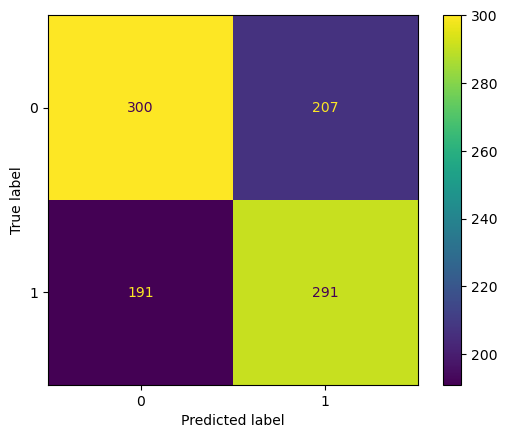

In [25]:
confusionMatrix = metrics.confusion_matrix(y_test, prediction)

figure = metrics.ConfusionMatrixDisplay(confusionMatrix)
figure.plot()